In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import urllib
% matplotlib inline
import seaborn as sns

Our dataset consists of housing prices and houses descriptions provided by real-estate firm in Ames, Iowa. The dataset contains as many as 82 columns - all describing each house in detail, noting the years it was built, remodeled and sold, its condition, all available utilities, description and number of rooms. All very useful information for the buyer, but cumbersome and expensive for the firm to collect. My task is to analyze this data using only its 13 features, discover possible trends and build the model that predicts sale prices.

In [2]:
data=pd.read_csv('assets/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

Selecting only the features required for this project. 

In [4]:
df=data[['LotArea', 'Utilities', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
        'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'GrLivArea', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'MoSold', 'YrSold', 'SalePrice']]
df.head() 

,LotArea,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice
0,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,1710,2,1,3,1,2,2008,208500
1,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1262,2,0,3,1,5,2007,181500
2,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,1786,2,1,3,1,9,2008,223500
3,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,1717,1,0,3,1,2,2006,140000
4,14260,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,2198,2,1,4,1,12,2008,250000


In [5]:
len(df)

1460

In [6]:
df.columns

Index([u'LotArea', u'Utilities', u'Neighborhood', u'BldgType', u'HouseStyle',
       u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd',
       u'RoofStyle', u'RoofMatl', u'GrLivArea', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

Renaming the columns so they are easier to work with.

In [7]:
df.columns=['LotArea', 'Utilities', 'NBHD', 'BldgType', 'HouseStyle', 'OverallQlt', 'OverallCond', 'YearBuilt', 'YearRemod',\
           'RoofStyle', 'RoofMatl', 'LivingArea', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'MonthSold', 'YearSold',\
           'SalePrice']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotArea        1460 non-null int64
Utilities      1460 non-null object
NBHD           1460 non-null object
BldgType       1460 non-null object
HouseStyle     1460 non-null object
OverallQlt     1460 non-null int64
OverallCond    1460 non-null int64
YearBuilt      1460 non-null int64
YearRemod      1460 non-null int64
RoofStyle      1460 non-null object
RoofMatl       1460 non-null object
LivingArea     1460 non-null int64
FullBath       1460 non-null int64
HalfBath       1460 non-null int64
Bedroom        1460 non-null int64
Kitchen        1460 non-null int64
MonthSold      1460 non-null int64
YearSold       1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(13), object(6)
memory usage: 216.8+ KB


Inspecting the columns. LotArea shows some big outliers. After inspecting them in the 
box plot - I will be removing observations that are over 100,000 sq ft and far away from the central tendency

In [9]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

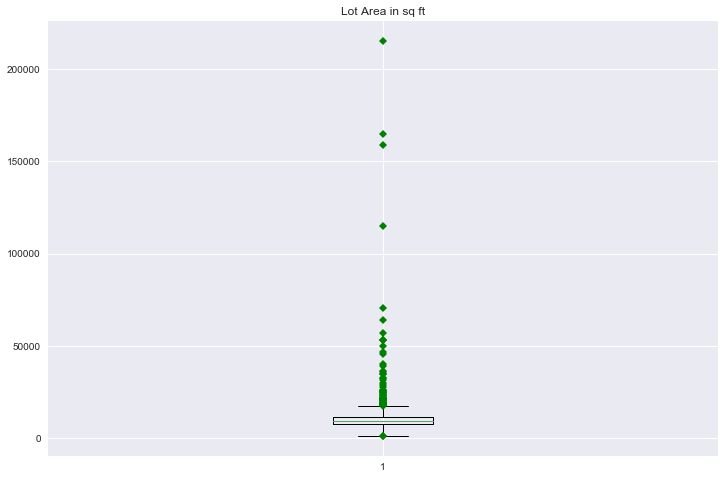

In [10]:
data = [df['LotArea']]
fig, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(data, 0, 'gD')
plt.title('Lot Area in sq ft')


In [11]:
df.loc[df['LotArea'] >100000, :].index

Int64Index([249, 313, 335, 706], dtype='int64')

Removing these outliers

In [12]:
df.drop([249, 313, 335, 706], inplace=True) 

In [13]:
df['Utilities'].value_counts() 

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

All observations are of the same type in the "Utilities" column; there is just one observation that's different. There's no useful information for the model here, so I'm removing this column.

In [14]:
df.drop('Utilities', inplace=True, axis=1)

In [15]:
df['LivingArea'].describe() 

count    1456.000000
mean     1514.276786
std       525.655659
min       334.000000
25%      1128.000000
50%      1458.500000
75%      1775.250000
max      5642.000000
Name: LivingArea, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x11188cbd0>],
 'caps': [<matplotlib.lines.Line2D at 0x11189bb10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1118a9e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1118a97d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11188cd90>,
  <matplotlib.lines.Line2D at 0x11189b4d0>]}

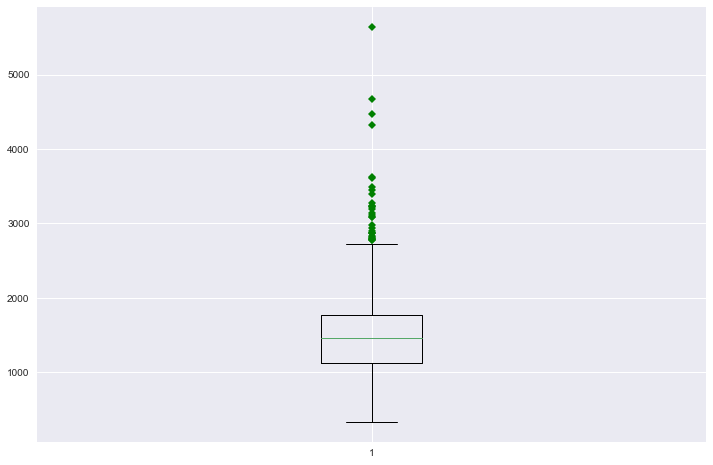

In [16]:
data = [df['LivingArea']]
fig, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(data, 0, 'gD')   

Big outliers in the LivingArea column - I'm going to remove data points that are over 4000 sq ft and are far away from the rest of the data.

In [17]:
df.loc[df['LivingArea'] >4000, :].index

Int64Index([523, 691, 1182, 1298], dtype='int64')

In [18]:
df.drop([523, 691, 1182, 1298], inplace=True)

Inspecting the "Bedroom" column.

{'boxes': [<matplotlib.lines.Line2D at 0x111f25b50>],
 'caps': [<matplotlib.lines.Line2D at 0x111f32a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x111f3fd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x111f3f750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111f25d10>,
  <matplotlib.lines.Line2D at 0x111f32450>]}

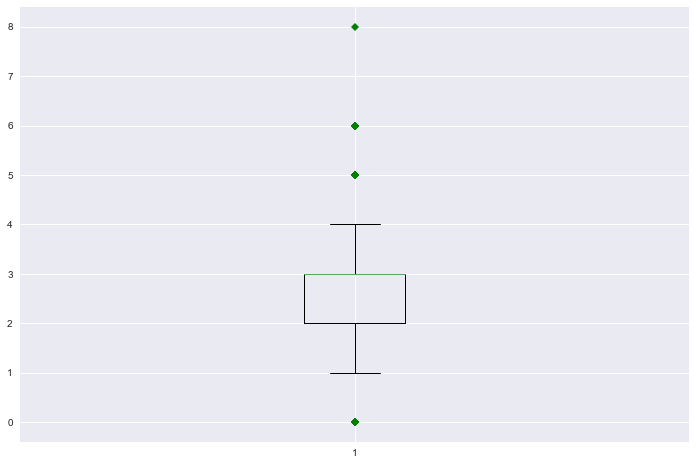

In [19]:
data = [df['Bedroom']]
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.boxplot(data, 0, 'gD')

In [20]:
df.loc[df['Bedroom'] ==8, :].index

Int64Index([635], dtype='int64')

Dropping the outlier - one house with 8 bedrooms

In [21]:
df.drop([635], inplace=True) 

Whether to drop outliers or not is a decision a data scientist needs to make depending on the dataset. Big houses with a LotArea over 100 000 sq ft and 8-bedroom homes are real, but very rare cases for Ames, IA. These data points will be skewing our distribution and our model won’t generalize well. We are dropping large outliers to have our model perform well most of the time, accepting that it will probably be failing at predicting prices for very large homes.

Inspecting correlations in the dataset - price looks to be strongly correlated with overall quality, living area, years the house was built and remodeled, number of full bathrooms.

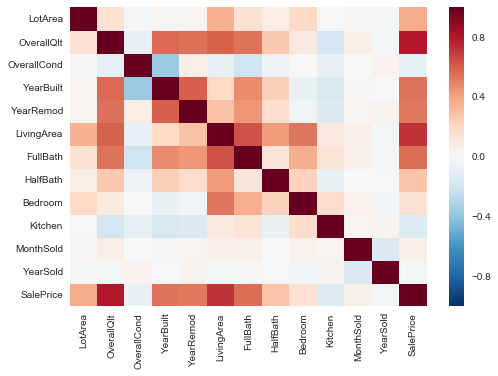

In [22]:
sns.heatmap(df.corr())

Lets see where most sales are taking place:

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


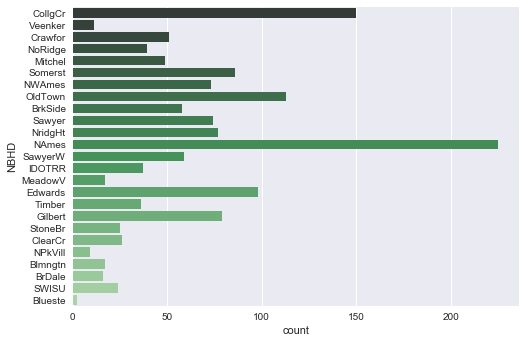

In [23]:
sns.countplot(y="NBHD", data=df, palette="Greens_d")
# sns.countplot(y="count", data=my_df, palette="Greens_d");

Most of the houses are sold in North Ames, followed by College Cedar Rapids, Old Town and Edwards.

In [24]:
my_df = pd.DataFrame(df['NBHD'].value_counts())

my_df.columns = ['count']

my_df = my_df.sort_values('count', ascending = False)

my_df.reset_index(drop = False, inplace = True)

In [25]:
price_neigh = pd.DataFrame(zip(df['NBHD'], df['SalePrice'] ))
price_neigh.columns=['Neighb', 'sales']
price_neigh = price_neigh.sort_values(by = 'sales', ascending=False)
price_neigh.head(5)

,Neighb,sales
1162,NoRidge,625000
891,NridgHt,611657
796,NridgHt,582933
1039,StoneBr,556581
437,NridgHt,555000


Lets look at the distribution of sales prices by neighborhood.

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


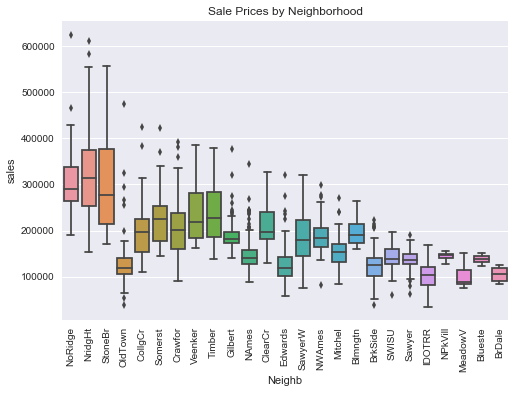

In [26]:
ax = sns.boxplot(x="Neighb", y="sales", data=price_neigh,
                showcaps=True,showfliers=True)
plt.title('Sale Prices by Neighborhood')

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [27]:
# AVerage sale price by year
d=pd.DataFrame(pd.pivot_table(df, index='YearSold', values='SalePrice'))
d.reset_index(level=0, inplace=True)
d.columns=['years', 'avprices']
d

,years,avprices
0,2006,182549.458599
1,2007,181891.724458
2,2008,177247.500000
3,2009,178851.783383
4,2010,177393.674286


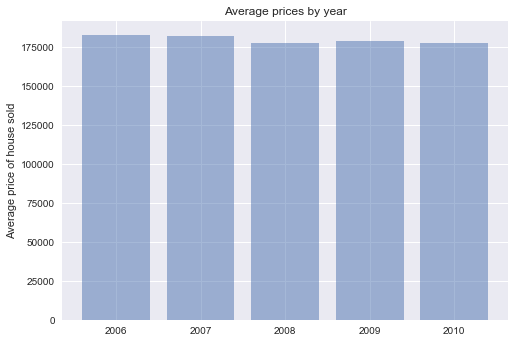

In [28]:
years = ('2006', '2007', '2008', '2009', '2010')
y_pos = np.arange(len(years))
performance = d['avprices']
 
   
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Average price of house sold')
plt.title('Average prices by year')

 
    
plt.show()

Average price of a house over the years has stayed roughly the same.

In [29]:
r=pd.DataFrame(pd.pivot_table(df, index='YearSold', values='SalePrice', aggfunc='sum'))
r.reset_index(level=0, inplace=True)
r.columns=['yr', 'totalsum']
r

,yr,totalsum
0,2006,57320530
1,2007,58751027
2,2008,53528745
3,2009,60273051
4,2010,31043893


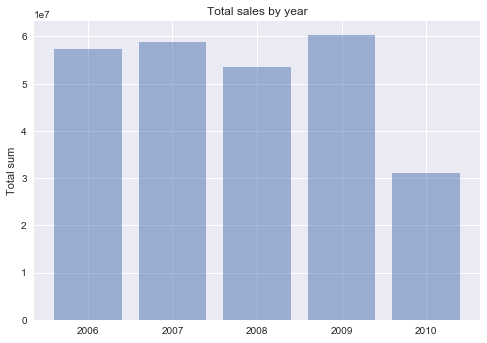

In [30]:
years = ('2006', '2007', '2008', '2009', '2010')
y_pos = np.arange(len(years))
performance = r['totalsum']
 
   
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Total sum')
plt.title('Total sales by year')

 
    
plt.show()

Total sales stayed roughly the same in 2006 and 2007, then going down a bit in 2008 (the year of financial crisis) and rising significantly in 2009 and then falling by 50% in 2010. Without considering all other factors and taking just this isolated information, one can conclude that the impact of the crisis is not felt immidiatelly, but 1-2 years later.

In [31]:
v=pd.DataFrame(df['YearSold'].value_counts())
v
v.reset_index(level=0, inplace=True)
v.columns=['year', 'price']
v

,year,price
0,2009,337
1,2007,323
2,2006,314
3,2008,302
4,2010,175


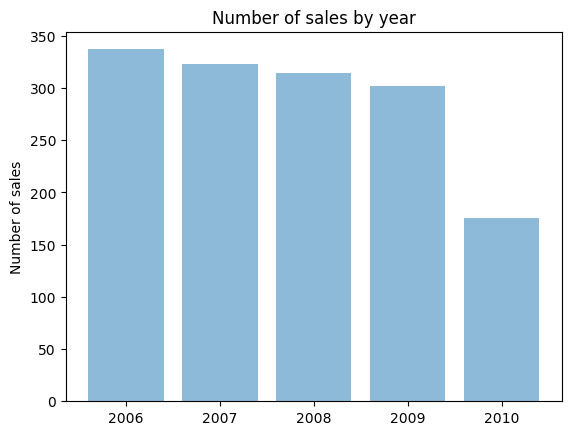

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
years = ('2006', '2007', '2008', '2009', '2010')
y_pos = np.arange(len(years))
performance = v['price']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Number of sales')
plt.title('Number of sales by year')
 
plt.show()

Another confirmation of the downward trend - number of sales keeps dropping each year, with the largest drop (50%) in 2010.

### Modeling

Creating dummies out of my categorical data - neighborhoods, building type, house style, overall quality,
overall condition, roof style, roof material, number of full baths, half baths, number of bedrooms and kitchens, month
when the house was sold.

In [33]:
nbdg=pd.get_dummies(df['NBHD'], drop_first=True)
new_df= pd.concat([df, nbdg], axis=1 )
new_df.drop('NBHD', inplace=True, axis=1)

In [34]:
build=pd.get_dummies(new_df['BldgType'], drop_first=True)
new_df= pd.concat([new_df, build], axis=1 )
new_df.drop('BldgType', inplace=True, axis=1)

In [35]:
house=pd.get_dummies(new_df['HouseStyle'], drop_first=True)
new_df= pd.concat([new_df, house], axis=1 )
new_df.drop('HouseStyle', inplace=True, axis=1)

In [36]:
qual=pd.get_dummies(new_df['OverallQlt'], drop_first=True)
new_df= pd.concat([new_df, qual], axis=1 )
new_df.drop('OverallQlt', inplace=True, axis=1)

In [37]:
cond=pd.get_dummies(new_df['OverallCond'], drop_first=True)
new_df= pd.concat([new_df, cond], axis=1 )
new_df.drop('OverallCond', inplace=True, axis=1)

In [38]:
rstyle=pd.get_dummies(new_df['RoofStyle'], drop_first=True)
new_df= pd.concat([new_df, rstyle], axis=1 )
new_df.drop('RoofStyle', inplace=True, axis=1)

In [39]:
matl=pd.get_dummies(new_df['RoofMatl'], drop_first=True)
new_df= pd.concat([new_df, matl], axis=1 )
new_df.drop('RoofMatl', inplace=True, axis=1)

In [40]:
bath=pd.get_dummies(new_df['FullBath'], drop_first=True)
new_df= pd.concat([new_df, bath], axis=1 )
new_df.drop('FullBath', inplace=True, axis=1)

In [41]:
hbath=pd.get_dummies(new_df['HalfBath'], drop_first=True)
new_df= pd.concat([new_df, hbath], axis=1 )
new_df.drop('HalfBath', inplace=True, axis=1)

In [42]:
bed=pd.get_dummies(new_df['Bedroom'], drop_first=True)
new_df= pd.concat([new_df, bed], axis=1 )
new_df.drop('Bedroom', inplace=True, axis=1)

In [43]:
kitch=pd.get_dummies(new_df['Kitchen'], drop_first=True)
new_df= pd.concat([new_df, kitch], axis=1 )
new_df.drop('Kitchen', inplace=True, axis=1)

In [44]:
month=pd.get_dummies(new_df['MonthSold'], drop_first=True)
new_df= pd.concat([new_df, month], axis=1 )
new_df.drop('MonthSold', inplace=True, axis=1)

Preparing data for my models - I am going to try a few models to see which one performs best at predicting the price.

In [45]:
X=new_df[[i for i in list(new_df.columns) if i != 'SalePrice']]

In [46]:
len(X.columns)

233

In [47]:
y=new_df['SalePrice']

Splitting my data before I start testing the models

In [48]:
from sklearn.cross_validation import train_test_split      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=20)

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
print 'Length of X_train: ' + str(len(X_train))
print 'Length of y_train: ' + str(len(y_train))
print
print 'Length of X_test: ' + str(len(X_test))
print 'Length of y_test: ' + str(len(y_test))

Length of X_train: 1160
Length of y_train: 1160

Length of X_test: 291
Length of y_test: 291


In [50]:
lr = linear_model.LinearRegression()
lr_model=lr.fit(X_train,y_train)
lr_model

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
import pickle


with open('pickled_model.pkl', 'w') as picklefile:
    pickle.dump(lr_model, picklefile)

In [52]:
predictions=lr_model.predict(X_test)

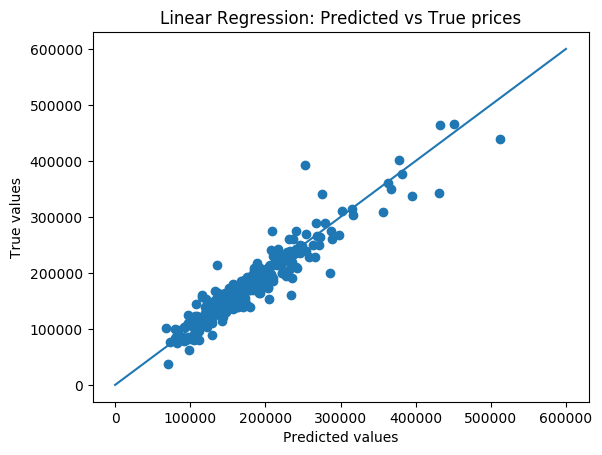

In [53]:
plt.scatter(predictions, y_test)
plt.plot([0,600000], [0, 600000])
plt.title('Linear Regression: Predicted vs True prices')
plt.ylabel('True values')
plt.xlabel('Predicted values')

In [54]:
from sklearn.cross_validation import cross_val_score
cross_val_score(lr, X_train, y_train, cv=4)

array([ 0.85778074,  0.87251313,  0.82302006,  0.89504672])

In [55]:
lr_r2 =  lr_model.score(X_train, y_train)
lr_r2

0.89887389168256959

Linear Regression shows high r^2 here and will make pretty good predictions.
Lets see if other models can score even better.

In [56]:
rcv = linear_model.RidgeCV(alphas=
                           (.01, .1, .5, 1, 5, 10),
                           store_cv_values=True,
                          )

Trying Ridge with 6 different alpha values

In [57]:
rcv_model = rcv.fit(X_train, y_train)
rcv_model

RidgeCV(alphas=(0.01, 0.1, 0.5, 1, 5, 10), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=True)

In [58]:
predict=rcv_model.predict(X_test)

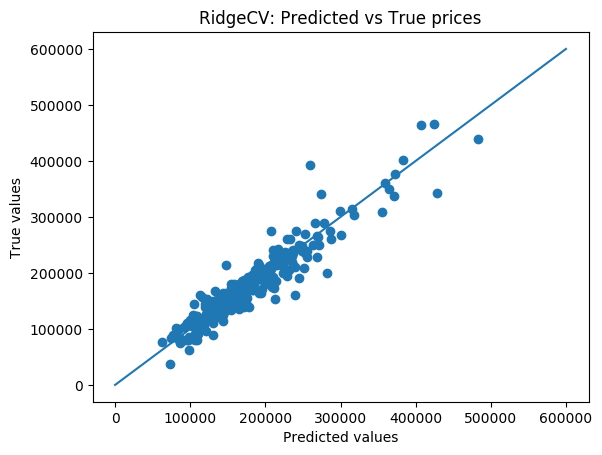

In [59]:
plt.scatter(predict, y_test)
plt.plot([0,600000], [0, 600000])
plt.title('RidgeCV: Predicted vs True prices')
plt.ylabel('True values')
plt.xlabel('Predicted values')

In [60]:
cross_val_score(rcv, X_train, y_train, cv=4)

array([ 0.86509692,  0.87371032,  0.8366345 ,  0.88608358])

In [61]:
rcv_r2 =  rcv_model.score(X_train, y_train)
rcv_r2

0.89547288406606473

In [62]:
# this is the alpha that cv showed to have the best r^2
rcv_model.alpha_

5.0

Lets try Lasso regression

In [63]:
lasso = linear_model.Lasso(alpha=1)

In [64]:
lasso_model=lasso.fit(X_train, y_train)

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [65]:
lasso_r2 =  lasso_model.score(X_train, y_train)
lasso_r2

0.89886089666961544

In [66]:
lasso5=linear_model.Lasso(alpha=5)

In [67]:
lasso_model5=lasso5.fit(X_train, y_train)

In [68]:
lasso5_r2 =  lasso_model5.score(X_train, y_train)
lasso5_r2

0.89860561792325699

In [69]:
lasso10=linear_model.Lasso(alpha=10)

In [70]:
lasso_model10=lasso10.fit(X_train, y_train)

In [71]:
lasso10_r2 =  lasso_model10.score(X_train, y_train)
lasso10_r2

0.89840209164676332

In [72]:
y_pred_lasso5 = lasso_model5.predict(X_test)

In [73]:
y_pred_lasso10=lasso_model10.predict(X_test)

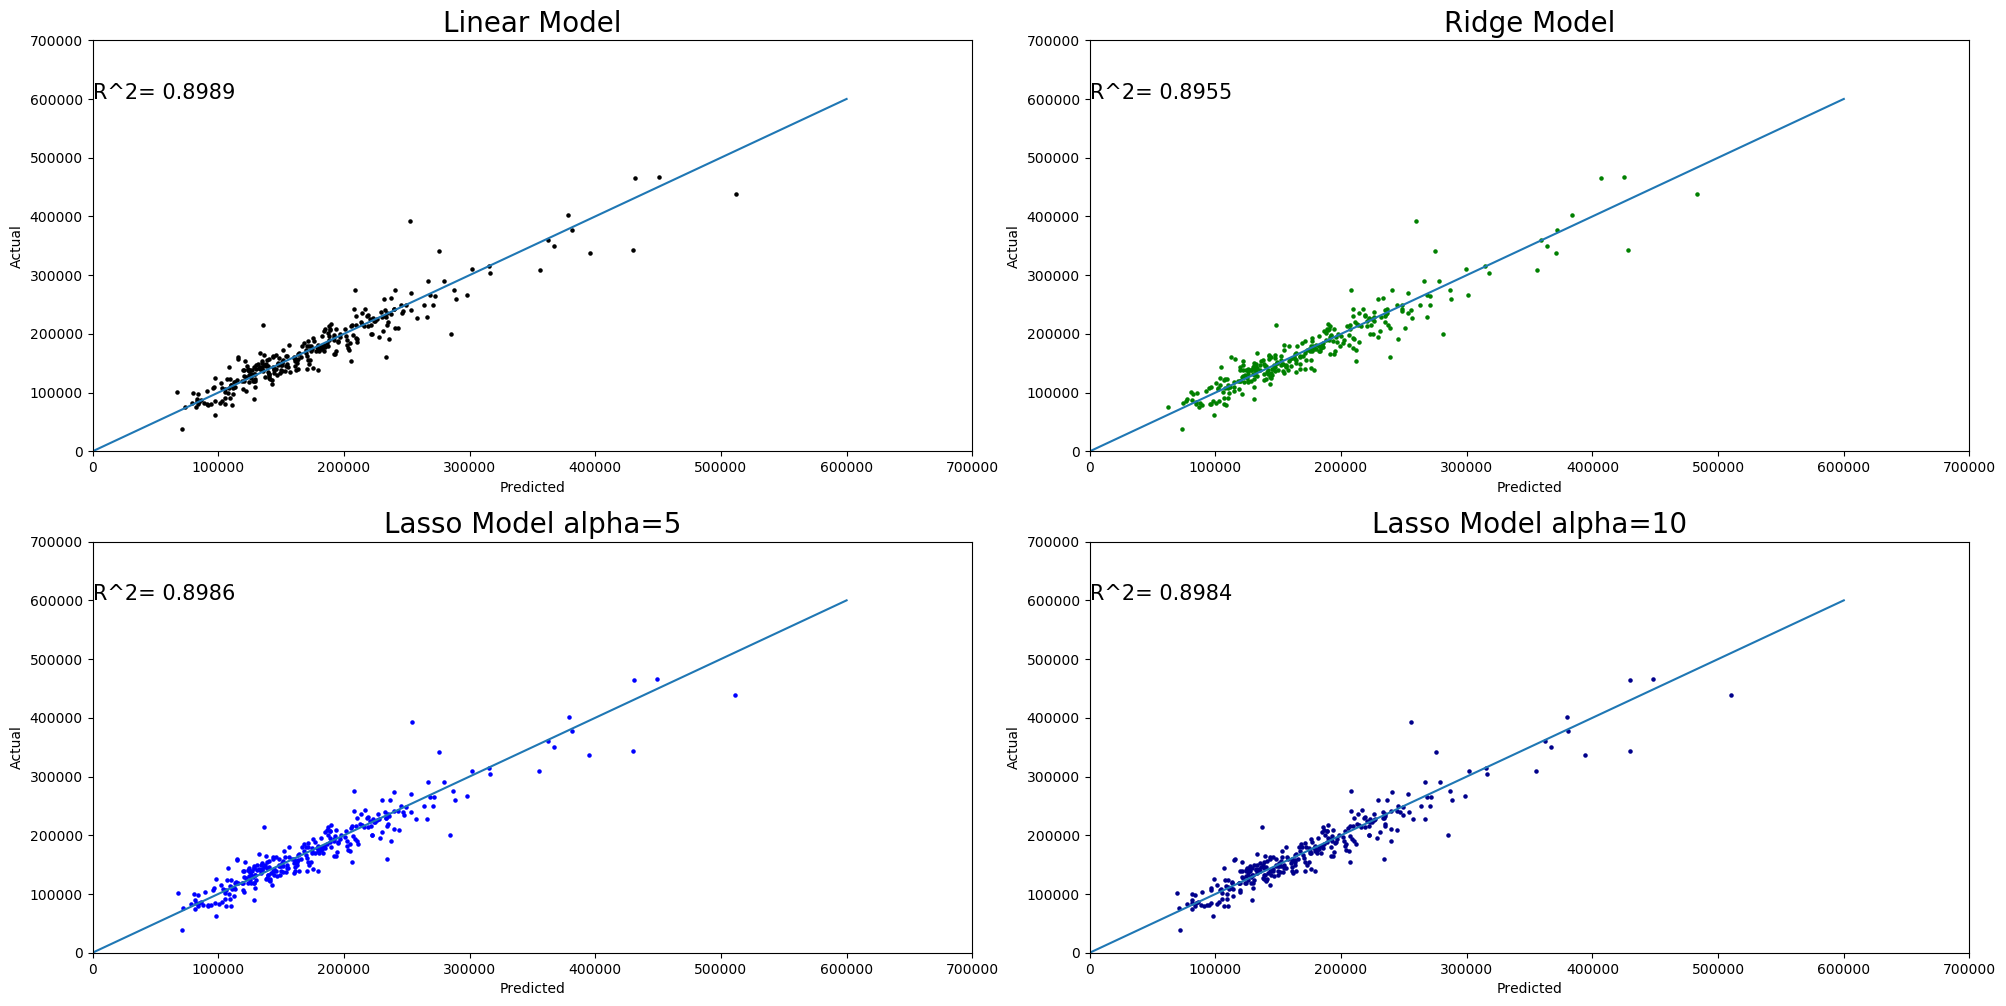

In [74]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

axes[0][0].scatter(predictions, y_test, c='k', s=5)
axes[0][0].plot([0,600000], [0, 600000])
axes[0][0].set_xlim([0, 700000])
axes[0][0].set_ylim([0, 700000])
axes[0][0].text(25, 600000, "R^2= %s" %lr_r2.round(4), fontsize=15)

axes[0][1].scatter(predict, y_test, c='green', s=5)
axes[0][1].plot([0,600000], [0, 600000])
axes[0][1].set_xlim([0, 700000])
axes[0][1].set_ylim([0, 700000])
axes[0][1].text(25, 600000, "R^2= %s" %rcv_r2.round(4), fontsize=15)


axes[1][0].scatter(y_pred_lasso5, y_test, c='blue', s=5)
axes[1][0].plot([0,600000], [0, 600000])
axes[1][0].set_xlim([0, 700000])
axes[1][0].set_ylim([0, 700000])
axes[1][0].text(25, 600000, "R^2= %s" %lasso5_r2.round(4), fontsize=15)


axes[1][1].scatter(y_pred_lasso10, y_test, c='darkblue', s=5)
axes[1][1].plot([0,600000], [0, 600000])
axes[1][1].set_xlim([0, 700000])
axes[1][1].set_ylim([0, 700000])
axes[1][1].text(25, 600000, "R^2= %s" %lasso10_r2.round(4), fontsize=15)


axes[0][0].set_title('Linear Model', fontsize=20)
axes[0][0].set_ylabel('Actual')
axes[0][0].set_xlabel('Predicted')

axes[0][1].set_title('Ridge Model', fontsize=20)
axes[0][1].set_ylabel('Actual')
axes[0][1].set_xlabel('Predicted')

axes[1][0].set_title('Lasso Model alpha=5', fontsize=20)
axes[1][0].set_ylabel('Actual')
axes[1][0].set_xlabel('Predicted')

axes[1][1].set_title('Lasso Model alpha=10', fontsize=20)
axes[1][1].set_ylabel('Actual')
axes[1][1].set_xlabel('Predicted');

plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=1.2)

The most important predictors of the price are living area and overall quality, also, the year when the house was built and remodeled. We estimated the number of sales for each neighborhood, with most houses being sold in North Ames, followed by College Cedar Rapids, Old Town and Edwards. With the average sale price staying approximately the same, we saw that the number of sales kept shrinking from 2006 to 2009 and dropping significantly in 2010. So the houses still cost the same, but less people want to buy them.
We also built a few predictive models that perform well and would be useful in estimating the price for the new properties.